In [1]:

#START FROM HERE For TRAINING PURPOSES START FROM THIS CELL, PROVIDED THE PICKLE FILE WAS PREVIOUSLY CREATED

 
import tensorflow as tf
import numpy as np
import random
import time  
import matplotlib.pyplot as plt
from PIL import Image
import os
import sys
import scipy.io as scp
import sklearn as skl
import  urllib.request as urlreq
import random
from IPython.display import display, Image
import tarfile
from datetime import datetime
from six.moves import cPickle as pickle
%matplotlib inline
print ("Tensor flow version is -- ", tf.__version__) 

Tensor flow version is --  1.0.0


In [2]:

pickle_file =  'multi_image_cnn.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels  = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels  = save['valid_labels']
    test_dataset  = save['test_dataset']
    test_labels   = save['test_labels']
    del save  

print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (230000, 32, 32, 1) (230000, 6)
Validation set (5755, 32, 32, 1) (5755, 6)
Test set (13068, 32, 32, 1) (13068, 6)


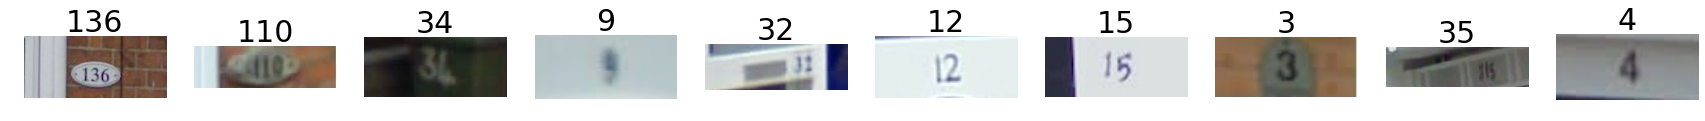

In [3]:

from PIL import Image
import PIL.Image
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.ndimage as nd 
plt.rcParams['figure.figsize'] = (30.0, 2.0)
f, ax = plt.subplots(nrows=1, ncols=10)

fno = [] 
#a=[93,42,43,1837,535]
testd  = np.ndarray( shape=(10,32,32,1), dtype='float32'   ) 
testl  =np.ndarray( shape=(10), dtype=int  )
'''
for i  in range(5):
    filename =str(i+1)+'.png'
    im = Image.open(filename)  
    img = np.dot(np.array(im, dtype='float32'), [[0.2989],[0.5870],[0.1140]]) 
    testd [i,:,:,:]= img
    testl [i] = a[i]
    ax[0,i].axis('off')
    ax[0,i].set_title(a[i], loc='center')
    ax[0,i].imshow(im)
  '''
for i, j in enumerate(np.sort(np.random.randint(0, test_labels.shape[0], size=10))):
    filename = str(j+1)+'.png'
    fullname = os.path.join('mat/test/', filename)
    house_num = ''
    testd [i,:,:,:]=  test_dataset[j,:,:,:]
    fno.extend([j])
    for k in np.arange(test_labels[j,0]):
        house_num += str(test_labels[j,k+1])
    
    testl [i] = int(house_num)
    
    im = Image.open(fullname) 
    ax[i].axis('off')
    ax[i].set_title(house_num, loc='center', fontsize=30)
    ax[i].imshow(im)
 

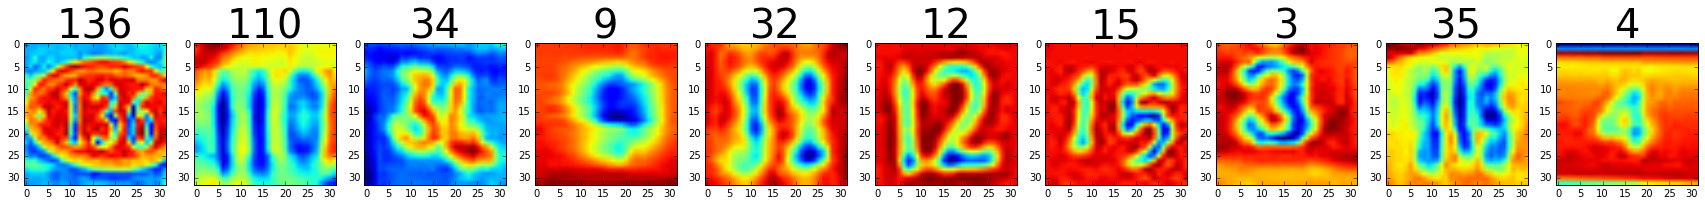

In [4]:

def showgreyscale(data, label): 
    size = 10
    fig=plt.figure(1,figsize=(30, 30))  
    for i in range(1,11,1):
        plt.subplot(1,10,i) 
        plt.title(label[ i-1 ], loc='center', fontsize=40)
        plt.imshow(data[  i-1  ,:,:])
    plt.show()
    plt.close(fig)
    
showgreyscale( testd[:,:,:,0], testl)

In [5]:
def new_weights(shape, name):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1), name = name)
def new_biases(length , name):
    return tf.Variable(tf.constant(1.0, shape=[length]), name = name)
 
#  images are 32 pixels in each dimension.
image_size = 32 
num_channels = 1 
num_classes = 11  
batch_size= 10 

#convolution layer1
filter_size = 5 #5x5 pixels
num_filters1 = 16 #and 16 filters

#convolution layer2
num_filters2 = 32

#convolution layer3
num_filters3 = 64

#convolution layer4
num_filters4 = 128

fc_size1 = 256 
fc_size2 = 64 

graph = tf.Graph()

with graph.as_default():

    # Input parameters 
    #tf_test_dataset = tf.constant(testd)
    tf_test_dataset = tf.placeholder(tf.float32, shape=(10, 32, 32, 1), name="batch_data")
     
    weights1 = new_weights(shape=[filter_size, filter_size, num_channels, num_filters1] , name='weights1')  
    biases1  = new_biases (length=num_filters1, name='biases1')  


    weights2 = new_weights(shape=[filter_size, filter_size, num_filters1, num_filters2],name= 'weights2') 
    biases2  = new_biases (length=num_filters2, name='biases2')  


    weights3 = new_weights(shape=[filter_size, filter_size, num_filters2, num_filters3] , name='weights3') 
    biases3  = new_biases (length=num_filters3, name='biases3')  
    
    weights4 = new_weights(shape=[filter_size, filter_size, num_filters3, num_filters4] , name='weights3') 
    biases4  = new_biases (length=num_filters4, name='biases3')  

    weights_fc1 = new_weights(shape=[ 2*2*num_filters4, fc_size1], name ='weights_fc1') 
    biases_fc1 = new_biases (length=fc_size1, name='biases_fc1')  
    
    weights_fc2 = new_weights(shape=[ fc_size1, fc_size2], name ='weights_fc2') 
    biases_fc2 = new_biases (length=fc_size2, name='biases_fc2')  
    
    weights_d0  = new_weights(shape=[  fc_size2, num_classes],name='weights_d0') 
    biases_d0   = new_biases (length=num_classes,name='biases_d0')  
    weights_d1  = new_weights(shape=[  fc_size2, num_classes],name='weights_d1') 
    biases_d1   = new_biases (length=num_classes,name='biases_d1')  
    weights_d2  = new_weights(shape=[  fc_size2, num_classes],name='weights_d2') 
    biases_d2   = new_biases (length=num_classes,name='biases_d2')  
    weights_d3  = new_weights(shape=[  fc_size2, num_classes],name='weights_d3') 
    biases_d3   = new_biases (length=num_classes,name='biases_d3')  
    weights_d4  = new_weights(shape=[  fc_size2, num_classes],name='weights_d4') 
    biases_d4   = new_biases (length=num_classes,name='biases_d4')  
    weights_d5  = new_weights(shape=[  fc_size2, num_classes],name='weights_d5') 
    biases_d5   = new_biases (length=num_classes,name='biases_d5')  
 
    tf.summary.histogram('weights1',weights1) 
    tf.summary.histogram('weights_d0',weights_d0) 
    
    with tf.name_scope('conv_model'):
        def conv_model(data, keep_prob=1):
        
            print ( "Input Data shape ", tf.Print(data,[data]) )   

            with tf.name_scope('layer1'):
        # LAYER 1  converts 32 x 32 x 1  to   28 x 28 x 16        
                layer   = tf.nn.conv2d(input=data,  filter=weights1, strides=[1, 1, 1, 1],  padding='VALID') 
                layer0  = tf.nn.relu(layer+biases1)
                lrn     = tf.nn.local_response_normalization(layer0) 
                print ( "Conv. Layer 1 shape ", lrn.shape)   



        # LAYER 2 converts 28 x 28 x 16  to 24 x 24 x 32  and then max pools  
            with tf.name_scope('layer2'):
                layer   = tf.nn.conv2d(input=lrn,  filter=weights2, strides=[1, 1, 1, 1],  padding='VALID') 
                layer0  = tf.nn.relu(layer+biases2)
                lrn     = tf.nn.local_response_normalization(layer0) 
                print ( "Conv. Layer 2.0 shape ", lrn.shape)   
                maxpool = tf.nn.max_pool(value=lrn, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                print ( "Conv. Layer 2.1 shape ", maxpool.shape)   


        # LAYER 3 converts 12 x 12 x 32   to 8 x 8 x 64            
            with tf.name_scope('layer3'):
                layer   = tf.nn.conv2d(input=maxpool,  filter=weights3, strides=[1, 1, 1, 1],  padding='VALID') 
                layer0  = tf.nn.relu(layer+biases3) 
                lrn     = tf.nn.local_response_normalization(layer0) 
                print ( "Conv. Layer 3 shape ", lrn.shape)        
          
        # LAYER 4 converts 8 x 8 x 64   to 4 x 4x 128     and then max pool 
            with tf.name_scope('layer4'):
                layer   = tf.nn.conv2d(input=lrn,  filter=weights4, strides=[1, 1, 1, 1],  padding='VALID') 
                layer0  = tf.nn.relu(layer+biases4)
                lrn     = tf.nn.local_response_normalization(layer0) 
                print ( "Conv. Layer 4.0 shape ", lrn.shape)  
                maxpool = tf.nn.max_pool(value=lrn, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                print ( "Conv. Layer 4.1 shape ", maxpool.shape)   
                           
        # Flatten the previous layer  2 x 2 x 128  to 1 x 512
                dropout        =   tf.nn.dropout(maxpool, keep_prob=keep_prob)     
                dropout_shape  =   dropout.get_shape().as_list()
                num_features   =   dropout_shape[1] * dropout_shape[2] * dropout_shape[3]
                layer_flat     =   tf.reshape(dropout, [dropout_shape[0], num_features]) 
                print ( "After Flattening Layer 4 shape ", layer_flat.shape," and num of features ", num_features)


        #   Fully connected Layer 1  with RELU 
            with tf.name_scope('FC_Layer1'):     
                layer_fc1      =  tf.nn.relu(tf.matmul(layer_flat, weights_fc1) + biases_fc1 )
                print ( "Fully connected Layer 1 shape ", layer_fc1.shape)       


        #   Fully connected Layer 2  with RELU 
            with tf.name_scope('FC_Layer2'):     
                layer_fc2      =  tf.nn.relu(tf.matmul(layer_fc1, weights_fc2) + biases_fc2 )
                print ( "Fully connected Layer 2 shape ", layer_fc2.shape)       


        # LAYER FINAL  Fully connected 

            with tf.name_scope('Final_FC_Layer'):
                length = tf.matmul(layer_fc2, weights_d0) + biases_d0
                digit1 = tf.matmul(layer_fc2, weights_d1) + biases_d1
                digit2 = tf.matmul(layer_fc2, weights_d2) + biases_d2
                digit3 = tf.matmul(layer_fc2, weights_d3) + biases_d3
                digit4 = tf.matmul(layer_fc2, weights_d4) + biases_d4
                digit5 = tf.matmul(layer_fc2, weights_d5) + biases_d5
                print ( "FINAL Fully connected Layer 3 shape - length ", length.shape)  
                print ( "FINAL Fully connected Layer 3 shape - digit1 ", digit1.shape)  
                print ( "FINAL Fully connected Layer 3 shape - digit2 ", digit2.shape)  
                print ( "FINAL Fully connected Layer 3 shape - digit3 ", digit3.shape)  
                print ( "FINAL Fully connected Layer 3 shape - digit4 ", digit4.shape)  
                print ( "FINAL Fully connected Layer 3 shape - digit5 ", digit5.shape)  
                print (  "\n\n" ) 

            return [length, digit1, digit2, digit3, digit4, digit5]    
     
    
    [length, digit1, digit2, digit3, digit4, digit5] = conv_model(tf_test_dataset, 1) 
    
    predict = tf.stack([tf.nn.softmax(length),tf.nn.softmax(digit1),tf.nn.softmax(digit2),tf.nn.softmax(digit3),tf.nn.softmax(digit4),tf.nn.softmax(digit5)])  
       
    test_prediction = tf.transpose(tf.argmax(predict, 2))
    saver = tf.train.Saver() 
    

Input Data shape  Tensor("Print:0", shape=(10, 32, 32, 1), dtype=float32)
Conv. Layer 1 shape  (10, 28, 28, 16)
Conv. Layer 2.0 shape  (10, 24, 24, 32)
Conv. Layer 2.1 shape  (10, 12, 12, 32)
Conv. Layer 3 shape  (10, 8, 8, 64)
Conv. Layer 4.0 shape  (10, 4, 4, 128)
Conv. Layer 4.1 shape  (10, 2, 2, 128)
After Flattening Layer 4 shape  (10, 512)  and num of features  512
Fully connected Layer 1 shape  (10, 256)
Fully connected Layer 2 shape  (10, 64)
FINAL Fully connected Layer 3 shape - length  (10, 11)
FINAL Fully connected Layer 3 shape - digit1  (10, 11)
FINAL Fully connected Layer 3 shape - digit2  (10, 11)
FINAL Fully connected Layer 3 shape - digit3  (10, 11)
FINAL Fully connected Layer 3 shape - digit4  (10, 11)
FINAL Fully connected Layer 3 shape - digit5  (10, 11)





In [6]:

with tf.Session(graph=graph) as session:
    saver.restore(session, "/home/ubuntu/pynb/SVHN_multi_deep.ckpt")
    print("Model restored.")   
    test_prediction = session.run(test_prediction, feed_dict={tf_test_dataset:testd})
    print(test_prediction)
    print (testl)

Model restored.
[[ 3  1  3  1 10 10]
 [ 3  1  1  0 10 10]
 [ 2  3  4 10 10 10]
 [ 1  9 10 10 10 10]
 [ 2  3  2 10 10 10]
 [ 2  1  2 10 10 10]
 [ 2  1  5 10 10 10]
 [ 1  3 10 10 10 10]
 [ 3  3  1  5 10 10]
 [ 1  4 10 10 10 10]]
[136 110  34   9  32  12  15   3  35   4]


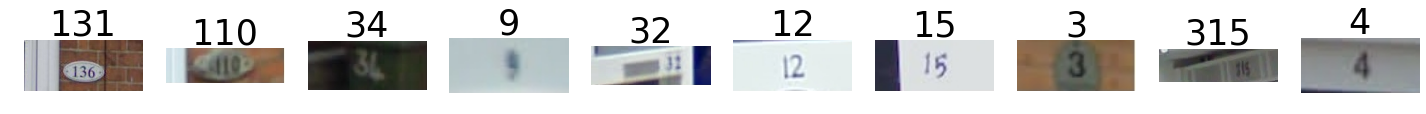

In [11]:
# plot predictions of the random sample

plt.rcParams['figure.figsize'] = (25.0, 25.0)
f, ax = plt.subplots(nrows=1, ncols=10)

for i, j in enumerate(fno):
    filename = str(j+1)+'.png'
    fullname = os.path.join('mat/test/', filename)
    im = Image.open(fullname)
    house_num = ''
    for k in np.arange(np.sum(test_prediction[i,:] != 10)-1):
        house_num += str(test_prediction[i,k+1])

    ax[i].axis('off')
    ax[i].set_title(house_num, loc='center', fontsize=35)
    ax[i].imshow(im)